### TOPIC: Prediction of financial distress: the case of companies listed on the Vietnamese stock market

### Introduction

According to the latest data from the General Statistics Office, the Ministry of Planning and Investment, in 2020 there will be a total of 101.7 thousand enterprises suspending business for a definite time, stopping operations pending dissolution and completing procedures. continued dissolution, up 13.9% over the previous year.

On average, nearly 8.5 thousand businesses withdraw from the market every month. This is an unprecedented number in the past 10 years.

The fact that enterprises are forced to suspend, wait for bankruptcy, and complete dissolution procedures has increased at this time, reflecting the difficulty of production and business conditions and the aggregate demand of a number of industries that has been falling deeply due to impact of the Covid-19 pandemic.

Predicting financial distress has been a topic of interest for many decades because of its significance to listed firms, interested stakeholders (which includes financial institutions, investors, government and researchers) and the country’s economy. Financial distress occurs when a company fails to meet its debt obligations to its creditors at maturity. Prolonged and severe financial hardship can lead to bankruptcy.

Traditionally, the assessment of a company's financial distress situation was primarily based on the subjective judgment of experts. However, this expert-based approach has several drawbacks, including inconsistent results that cannot be validated and are highly dependent on knowledgeable competence. As a result, other approaches to improving consistency and accuracy have been developed. These classification techniques are divided into two types: statistical methods and machine learning methods. In Vietnam, statistical methods have been widely used to predict financial distress, but machine learning methods have not been used much. In this study, I aim to apply machine learning and enhance the explainability of forecasting results based on the data of listed companies in Vietnam.

### Literature Review

Before the bankruptcy period, there was a difference in financial ratios between failed enterprises and normal enterprises, they tend to decline significantly from the average value and the degree of decline is increasing. when the financial distress of enterprises is more severe (Beaver, 1968; Altman, 1968).

Balasubramanian and Natarajan (2019) found 11 of the 13 variables to be significant and useful in predicting financial distress. Among the 11 variables, NAV, LTDER, ROI, RR, age, PHP and IH are the critical financial and non-financial predictors. Their results also help investors understand the financial as well as non-financial factors that contribute to financial distress, which would let them avoid investing in risky companies. Our findings would help creditors concentrate on parameters such as LTDER, ICR, CR, ROE, ROI, RR, NPM and PHP to understand the firm’s financial standing and be watchful for signs of impending financial distress to avoid capital loss and cost related to counterparty default.

Dirman (2020) studied the effect of profitability, liquidity, leverage, company size, and free cash flow on financial distress in manufacturing companies in the basic and chemical industry sectors that are listed on the Indonesia Stock Exchange. This study was conducted over 3 years of observation, namely 2016–2018. found that Company size has a negative effect and Profitability has a positive effect on financial distress. The results of the study indicate that the profitability variable has a positive effect on financial distress; variable liquidity, leverage, and free cash flow do not effect financial distress; and firm size variables have a negative effect on financial distress

Sehgal et al.(2021) researched On the determinants and prediction of corporate financial distress in India. The study’s empirical results suggest that five financial ratios, namely return on capital employed, cash flows to total liability, asset turnover ratio, fixed assets to total assets, debt to equity ratio and a measure of firm size (log total assets), play a highly significant role in distress prediction. The study’s findings suggest that machine learning-based models, namely support vector machine (SVM) and artificial neural network (ANN), are superior in terms of their prediction accuracy compared to the simple binomial logit model.

Ruizhao (2022) analyzed the factors affecting the financial distress of China's manufacturing industry, mainly from earnings per share EPS (deducted) (RMB), return on equity ROE (%), and return on total assets ROA as dependent variables, randomly selected the annual financial statements of 5 ST-listed manufacturing companies and 25 non-ST-listed manufacturing companies from 2019 to 2021 as financial distress samples, and used 3 financial indicators for research and analysis of explanatory variables. According to the analysis results, the researchers found that return on equity (ROE) and return on total assets (ROA) had a positive impact on the operating net profit margin. But earnings per share (EPS) (deducted) (RMB) will not have a positive impact on operating net profit margin.

In Viet Nam, Tran et al.(2022) used Machine Learning for Financial Distress Prediction, found that long-term debts to equity, enterprise value to revenues, account payable to equity, and diluted EPS had greatly influenced the financial distress.

### Data

The data is taken from cafef.vn, vietstock.vn websites and the financial statements of Vietnamese companies listed on the Ho Chi Minh Stock Exchange, the Hanoi Stock Exchange, and UPCOM. I also excluded financial, insurance, accounting, and banking companies because of differences in financial statements. Data were collected from 2016 to 2020 with 340 observations. Financial distress companies are identified based on criteria such as negative equity, EBITDA on interest being less than one for two consecutive years, and operational income being negative for three consecutive years (Tran et al, 2022). In addition, we also consult the external auditor’s conclusions in the financial statements and filter out companies suspected of not being able to operate continuously. Finally, the selected insolvency companies meet the above criteria and have sufficient financial data during the observation period to conduct the research. Companies will be labeled one if they are in the financial distress group and zero for the others.

### Variables

Based on previous studies, the variables used in this paper are:

LTDER =	Long-term debt/equity

ICR	= EBITDA/interest expense

ROE	= Net profit/equity

CR	= Current assets/current liabilities

NPM = Net profit after tax/Net sales

Firm Size =	Ln Total Assets

Asset Turnover Ratio = Net sales/total assets

FATA = fixed assets to total assets

ROA	= Net profit/ total assets

CFTD = cash flows from operations to total liability (total debt)

Financial distress: it is identified based on criteria such as negative equity, EBITDA on interest being less than one for two consecutive years, and operational income being negative for three consecutive years

### CODE

### 1. Import libraries

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import data
data = pd.read_excel("D:\\học tập\\NĂM 3\\hk 6\\ML\\CUỐI KỲ\\Data.xlsx", sheet_name=0)

In [ ]:
data

,id,year,company,exchange,industry,LTDER,ICR,ROE,CR,NPM,Firm_Size,Asset_Turnover_Ratio,FATA,ROA,CFTD,financial_distress
0,1,2016,SII,UPCOM,Utilities,1.367801,3.772681,0.023538,2.121464,0.117146,12.536281,0.074724,0.091811,0.008754,-0.087231,1.financial_distress
1,2,2017,SII,UPCOM,Utilities,1.015980,2.124018,0.021808,1.993211,0.118046,12.511457,0.086191,0.654784,0.010174,0.044452,1.financial_distress
2,3,2018,SII,UPCOM,Utilities,0.853671,1.757574,0.018300,2.199142,0.115950,12.487858,0.079368,0.714255,0.009203,-0.075808,1.financial_distress
3,4,2019,SII,UPCOM,Utilities,0.565952,2.363996,0.020678,0.852619,0.180338,12.454738,0.063429,0.756519,0.011439,-0.050127,1.financial_distress
4,5,2020,SII,UPCOM,Utilities,0.410890,0.972135,-0.076173,0.325490,-0.562701,12.390337,0.080311,0.798066,-0.045191,-0.052346,1.financial_distress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,336,2016,HC3,UPCOM,Construction and Real Estate,0.042583,0.000000,0.135971,1.178647,0.330121,11.716368,0.294030,0.178038,0.097065,0.316188,0.non-financial_distress
336,337,2017,HC3,UPCOM,Construction and Real Estate,0.031663,0.000000,0.445506,2.710577,1.177720,11.849463,0.293870,0.126706,0.346097,-0.145662,0.non-financial_distress
337,338,2018,HC3,UPCOM,Construction and Real Estate,0.027983,0.000000,0.140208,3.627078,0.616671,11.852865,0.188621,0.116248,0.116317,-0.292303,0.non-financial_distress
338,339,2019,HC3,UPCOM,Construction and Real Estate,0.025762,0.000000,0.113924,3.522148,0.308413,11.877216,0.305387,0.088426,0.094186,0.503371,0.non-financial_distress


### 2. EDA and clean the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    340 non-null    int64  
 1   year                  340 non-null    int64  
 2   company               340 non-null    object 
 3   exchange              340 non-null    object 
 4   industry              340 non-null    object 
 5   LTDER                 340 non-null    float64
 6   ICR                   340 non-null    float64
 7   ROE                   340 non-null    float64
 8   CR                    340 non-null    float64
 9   NPM                   340 non-null    float64
 10  Firm_Size             340 non-null    float64
 11  Asset_Turnover_Ratio  340 non-null    float64
 12  FATA                  340 non-null    float64
 13  ROA                   340 non-null    float64
 14  CFTD                  340 non-null    float64
 15  financial_distress    3

In [ ]:
data.columns

Index(['id', 'year', 'company', 'exchange', 'industry', 'LTDER', 'ICR', 'ROE',
       'CR', 'NPM', 'Firm_Size', 'Asset_Turnover_Ratio', 'FATA', 'ROA', 'CFTD',
       'financial_distress'],
      dtype='object')

In [ ]:
print('The dataset includes', data['company'].nunique(), 'listed companies in', data['industry'].nunique(), 'industries')

The dataset includes 68 listed companies in 12 industries


In [ ]:
df = data.drop(['id','year'],axis = 1)

In [ ]:
# Check for duplicate rows.
print(f"There are {data.duplicated().sum()} duplicate rows in the data set.")

There are 0 duplicate rows in the data set.


In [ ]:
# Check for null values
for i in [df]:
    print(f"\n{i.isnull().sum().sort_values(ascending=False)}")


company                 0
exchange                0
industry                0
LTDER                   0
ICR                     0
ROE                     0
CR                      0
NPM                     0
Firm_Size               0
Asset_Turnover_Ratio    0
FATA                    0
ROA                     0
CFTD                    0
financial_distress      0
dtype: int64


There are 0 cell with null values in the data set.

In [ ]:
#Looking unique values
print(df.nunique())

company                  68
exchange                  3
industry                 12
LTDER                   324
ICR                     276
ROE                     340
CR                      340
NPM                     340
Firm_Size               340
Asset_Turnover_Ratio    340
FATA                    340
ROA                     340
CFTD                    340
financial_distress        2
dtype: int64


#### Descriptive Statistics

In [ ]:
from copy import deepcopy
data_2 = deepcopy(df)

In [ ]:
Categorical=data_2.select_dtypes(include='object').columns.tolist()
Categorical

['company', 'exchange', 'industry', 'financial_distress']

In [ ]:
Categorical = df[Categorical]

In [ ]:
Categorical.describe()

,company,exchange,industry,financial_distress
count,340,340,340,340
unique,68,3,12,2
top,SII,UPCOM,Manufacturing,0.non-financial_distress
freq,5,185,105,240


The data had 68 companies with 340 observations, of which 100 observations were in financial distress, and 240 observations were in the group of non-financial distress.

In [ ]:
Numerical=data_2.select_dtypes(exclude='object').columns.tolist()
Numerical

['LTDER',
 'ICR',
 'ROE',
 'CR',
 'NPM',
 'Firm_Size',
 'Asset_Turnover_Ratio',
 'FATA',
 'ROA',
 'CFTD']

In [ ]:
Numerical = df[Numerical]
Numerical.describe()

,LTDER,ICR,ROE,CR,NPM,Firm_Size,Asset_Turnover_Ratio,FATA,ROA,CFTD
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.480295,999.460400,-0.102651,3.378540,-0.180937,11.940481,1.235501,0.321435,0.055285,0.462889
std,4.753528,11396.335889,2.551207,5.602149,2.883569,0.746413,1.781438,0.238324,0.150059,1.192698
min,-29.936573,-1499.678577,-40.820609,0.032334,-46.497895,10.310077,0.001969,0.000000,-0.861379,-2.652967
25%,0.001290,0.000000,0.047796,0.866387,0.000727,11.437421,0.229763,0.117248,0.000643,-0.004612
50%,0.025292,3.752847,0.126949,1.493149,0.072274,11.830384,0.668048,0.290537,0.060930,0.136156
75%,0.138534,49.178802,0.215422,3.510047,0.203474,12.348201,1.416397,0.490290,0.137196,0.647195
max,55.649876,205719.738594,3.650175,45.374276,5.780177,13.800775,14.546496,0.910154,0.467896,10.019373


The mean value of LTDER is 0.480295, with a differential rate of 4.753528; the maximum and minimum values are 55.649876 and -29.936573.

The mean value of ICR is 999.4604. The minimum and maximum values of asset intensity are -1499.678577 and 205719.738594, respectively.

The ROE ratio has a mean value of -0.102651, and its minimum and maximum values are -40.820609 and 3.6501759, respectively.

The mean value of CR is 3.378540. Simultaneously, the minimum and maximum values of CR are 0.032334 and 45.374276, respectively.

The mean value of NPM is -0.180937, with a differential rate of 2.883569; the maximum and minimum values are 5.780177 and -46.497895.

The mean value of Firm Size (log(total assets) is 11.940481. The minimum and maximum values are 10.310077 and 13.800775, respectively.

The mean value of Asset Turnover Ratio is 1.235501. Simultaneously, the minimum and maximum values are 0.001969 and 14.546496, respectively.

The mean value of FATA is 0.321435, with a differential rate of 0.238324; the maximum and minimum values are 0.910154 and 0.

The ROA ratio has a mean value of 0.055285, and its minimum and maximum values are -0.861379 and 0.467896, respectively.

The mean value of CFTD is 0.462889, with a differential rate of 1.192698; the maximum and minimum values are 10.019373 and -2.652967.

#### categorical_features

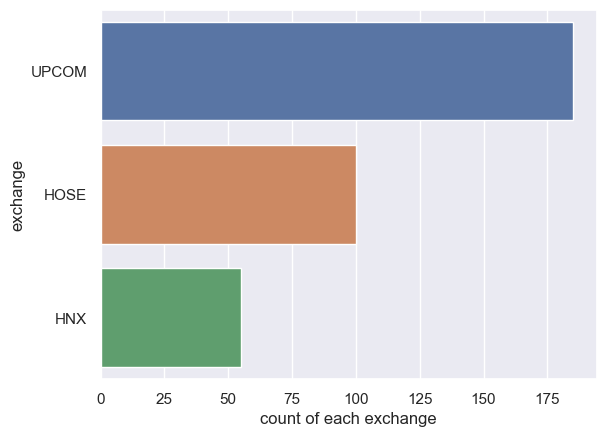

In [ ]:
sns.countplot(y=df['exchange'] ,data=df)
plt.xlabel("count of each exchange")
plt.ylabel("exchange")
plt.show()

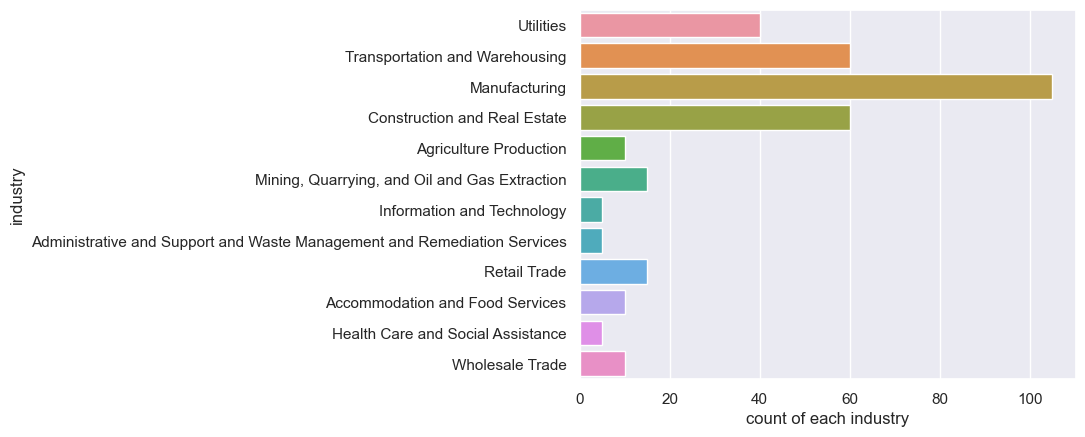

In [ ]:
sns.countplot(y=df['industry'] ,data=df)
plt.xlabel("count of each industry")
plt.ylabel("industry")
plt.show()

#### numerical_features

array([[<AxesSubplot:title={'center':'LTDER'}>,
        <AxesSubplot:title={'center':'ICR'}>,
        <AxesSubplot:title={'center':'ROE'}>],
       [<AxesSubplot:title={'center':'CR'}>,
        <AxesSubplot:title={'center':'NPM'}>,
        <AxesSubplot:title={'center':'Firm_Size'}>],
       [<AxesSubplot:title={'center':'Asset_Turnover_Ratio'}>,
        <AxesSubplot:title={'center':'FATA'}>,
        <AxesSubplot:title={'center':'ROA'}>],
       [<AxesSubplot:title={'center':'CFTD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

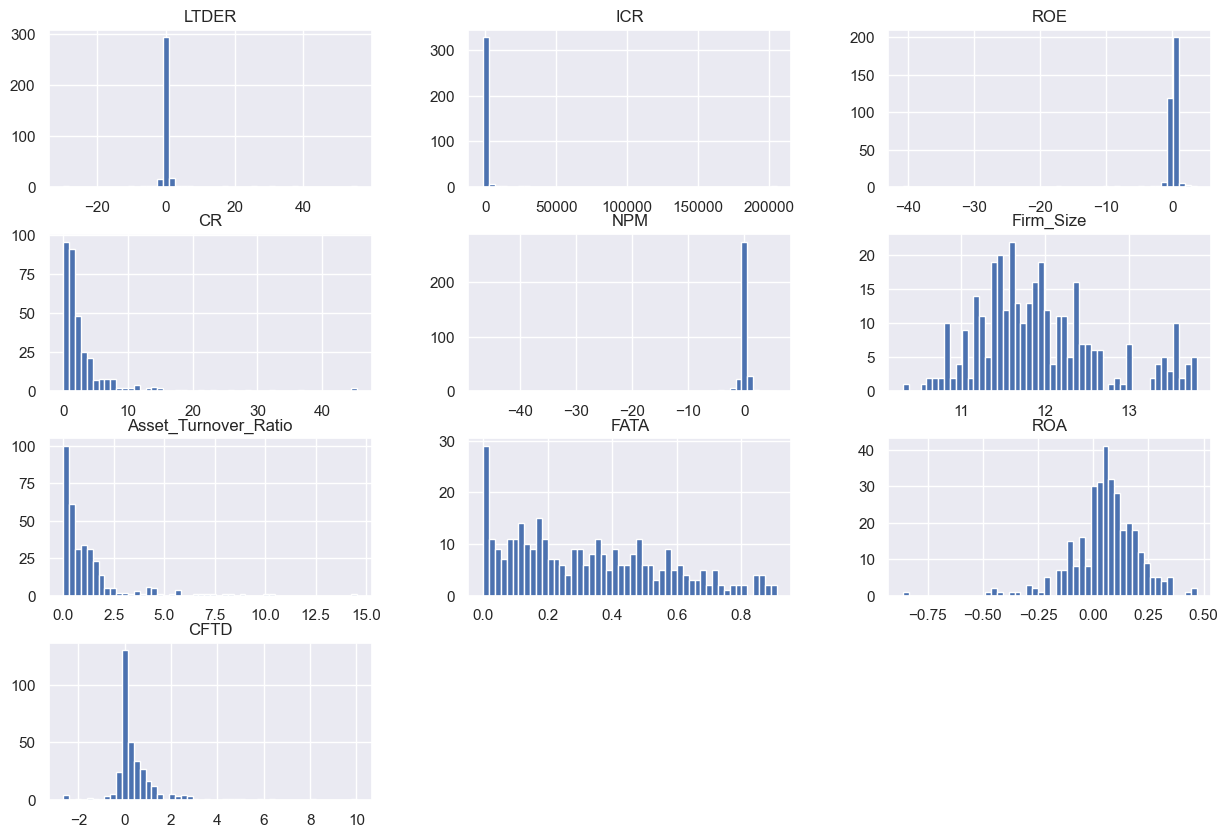

In [ ]:
Numerical.hist(bins=50, figsize=(15, 10))

#### Target

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df["financial_distress"].value_counts()

0.non-financial_distress    240
1.financial_distress        100
Name: financial_distress, dtype: int64

In [ ]:
print('The companies are in non-financial distress:', round(df["financial_distress"].value_counts()[0]/len(df) * 100,2), '% of data set')
print('The companies are in financial distress:', round(df["financial_distress"].value_counts()[1]/len(df) * 100,2), '% of data set')

The companies are in non-financial distress: 70.59 % of data set
The companies are in financial distress: 29.41 % of data set


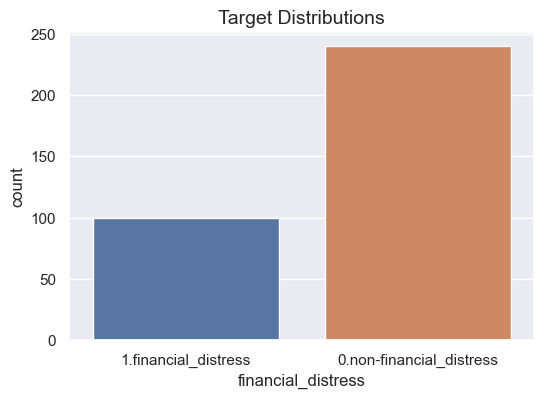

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x=df["financial_distress"])
plt.title("Target Distributions", fontsize=14)
plt.show()

The above graph shows that the data is biased towards datapoints with an outcome value of 0, which means that non-financial distress companies are more than financial distress companies. This is imbalace dataset.

In [ ]:
df = df.replace({"financial_distress":{"0.non-financial_distress":0,
                        "1.financial_distress":1}
                })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               340 non-null    object 
 1   exchange              340 non-null    object 
 2   industry              340 non-null    object 
 3   LTDER                 340 non-null    float64
 4   ICR                   340 non-null    float64
 5   ROE                   340 non-null    float64
 6   CR                    340 non-null    float64
 7   NPM                   340 non-null    float64
 8   Firm_Size             340 non-null    float64
 9   Asset_Turnover_Ratio  340 non-null    float64
 10  FATA                  340 non-null    float64
 11  ROA                   340 non-null    float64
 12  CFTD                  340 non-null    float64
 13  financial_distress    340 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 37.3+ KB


#### Correlation

In [ ]:
corr = pd.DataFrame(df.corr().iloc[:13,-1])
corr

,financial_distress
LTDER,0.134916
ICR,-0.056691
ROE,-0.165391
CR,-0.311552
NPM,-0.228660
Firm_Size,0.010642
Asset_Turnover_Ratio,-0.179494
FATA,0.122684
ROA,-0.666749
CFTD,-0.247228


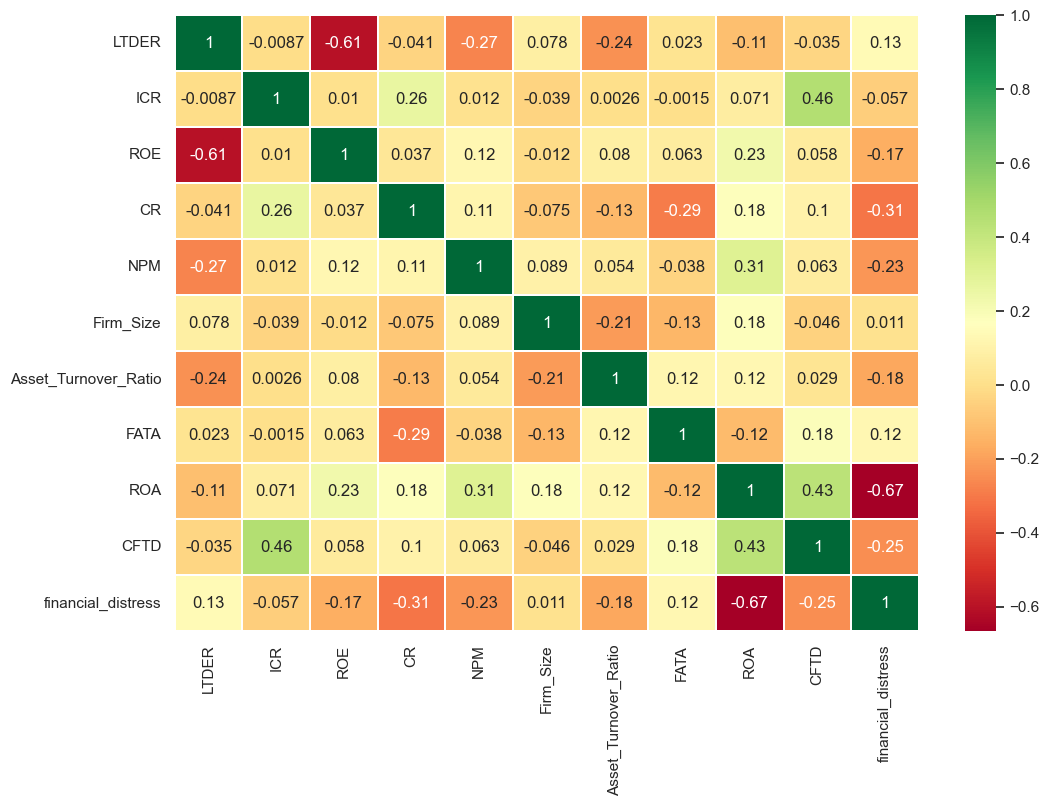

In [ ]:
# plot of the correlation matrix for the data set
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

The correlation between variables was low and well below 0.8. There is no multicollinearity between variables

### 3. Pre-processing

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, recall_score

In [ ]:
#ROC
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--',
             label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

#### Setting X and y variables to the prediction

In [ ]:
target = ['financial_distress']
#features = ['LTDER', 'ICR', 'ROE', 'CR', 'NPM', 'Firm_Size', 'Asset_Turnover_Ratio', 'FATA', 'ROA', 'CFTD']
features = ['LTDER', 'ICR', 'ROE', 'CR', 'NPM', 'ROA', 'CFTD']

In [ ]:
X = df[features].values
y = df[target].values

In [ ]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
n_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state=n_state)

### 4. Building the Model

#### Logistic regression

Logistic regression is a popular statistical technique for forecasting problems where the dependent variable is binary, specifically, the financial distress status in this study.

Logistic regression is often used as a benchmark in research to compare with other forecasting methods. The advantage of logistic regression is that the results are easy to interpret and understand for most users. In other words, this is one of the models with high explanatory power, so it is often used in practice at financial institutions.

In [ ]:
from sklearn.linear_model import LogisticRegression

a. Prediction

In [ ]:
# Define model
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=n_state)

# Fit X_train and y_train
LR_classifier.fit(X_train, y_train.ravel())

# Predicting the train set results
y_pred = LR_classifier.predict(X_train)

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_train, y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       173
           1       0.88      0.89      0.89        65

    accuracy                           0.94       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.94      0.94      0.94       238

Logistic Regression accuracy:  0.937


Text(0.5, 20.049999999999997, 'Predicted label')

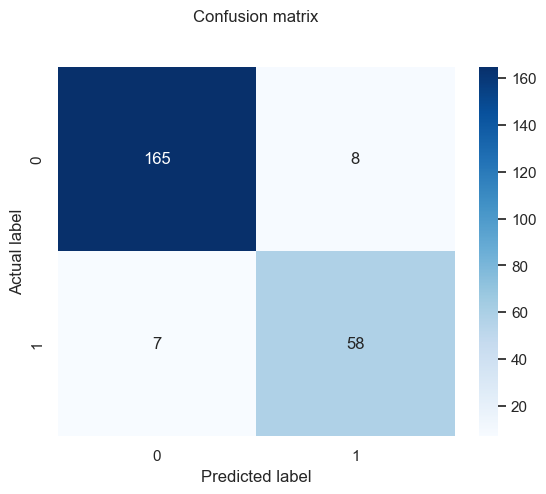

In [ ]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Predicting the test set results
LR_y_pred = LR_classifier.predict(X_test)

print('Classification report:')
print(classification_report(y_test,LR_y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_test, LR_y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        67
           1       0.74      0.89      0.81        35

    accuracy                           0.85       102
   macro avg       0.84      0.86      0.84       102
weighted avg       0.87      0.85      0.86       102

Logistic Regression accuracy:  0.8529


Text(0.5, 20.049999999999997, 'Predicted label')

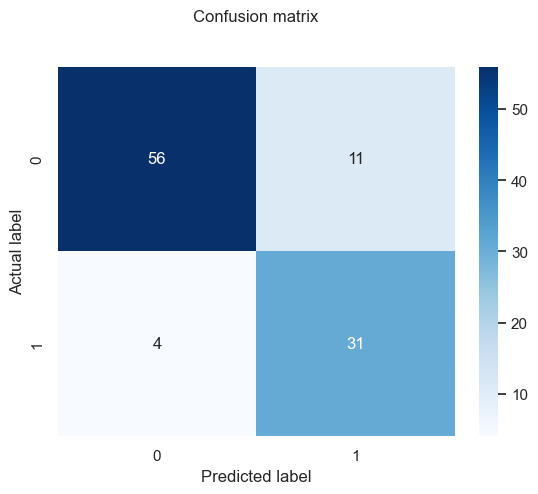

In [ ]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,LR_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

b. Feature Importance

In [ ]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': df.loc[:,features].columns,
    'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,Logistic Regression Feature Importance
3,CR,-1.118207
6,CFTD,-1.021217
5,ROA,-0.679779
4,NPM,0.331294
1,ICR,-0.167115
2,ROE,-0.069125
0,LTDER,0.005422


<AxesSubplot:ylabel='FeatureName'>

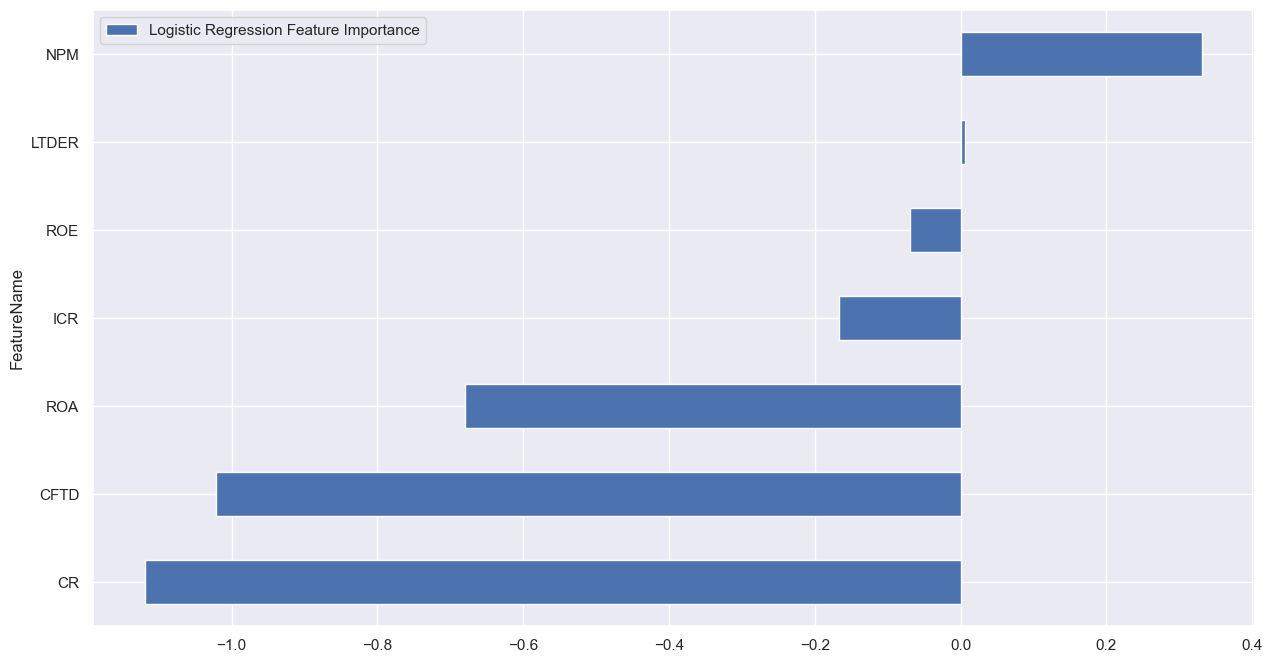

In [ ]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

c. ROC Curve

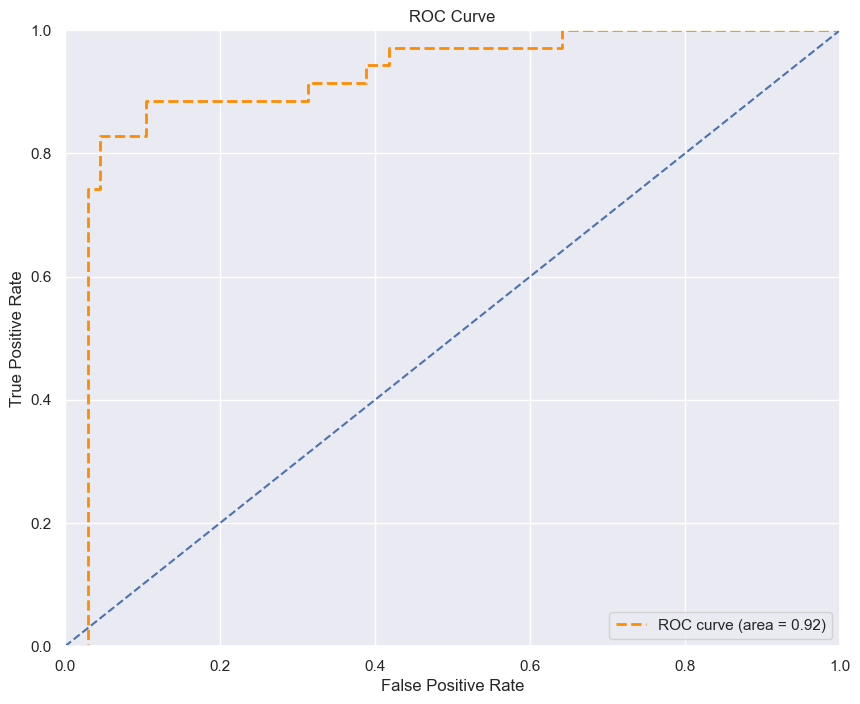

In [ ]:
# ROC
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
LR_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, LR_roc_auc)

### Decision Tree Classifier

Decision tree algorithms extract information from data to derive decision rules in the form of a tree structure. More specifically, the decision tree algorithm determines the best allocation to optimize each split with maximum purity based on a measure, such as the Gini Index or Entropy Index. The root of a decision tree is called the root node, the most distinguishable attribute. Leaf nodes represent classes, which are the following attributes.
The decision tree model has the advantage that model is intuitive and interpretable. However, the drawback is that this model is more prone to overfitting during the feature domain division or the branching process.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

a. Prediction

In [ ]:
# Define model
DT_classifier = DecisionTreeClassifier()
# Fit model
DT_classifier.fit(X_train, y_train.ravel())
# Predicting the train set results
y_pred = DT_classifier.predict(X_train)

print('Classification report:')
print(classification_report(y_train,y_pred))
print('Decision Tree accuracy: ', round(accuracy_score(y_train, y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00        65

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Decision Tree accuracy:  1.0


Text(0.5, 20.049999999999997, 'Predicted label')

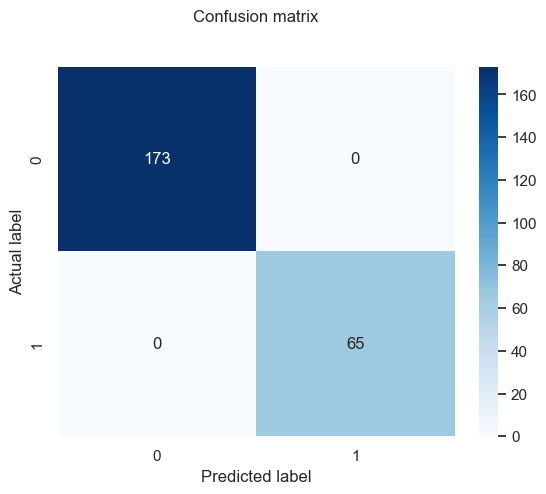

In [ ]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Predicting the test set results
DT_y_pred = DT_classifier.predict(X_test)

print('Classification report:')
print(classification_report(y_test,DT_y_pred))
print('Decision Tree accuracy: ', round(accuracy_score(y_test, DT_y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.89      0.94      0.92        35

    accuracy                           0.94       102
   macro avg       0.93      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102

Decision Tree accuracy:  0.9412


Text(0.5, 20.049999999999997, 'Predicted label')

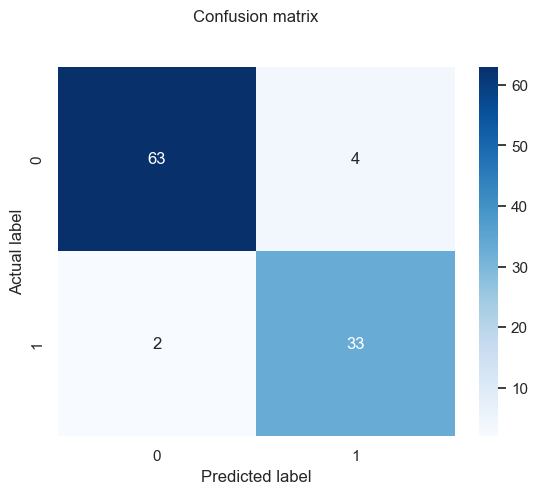

In [ ]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,DT_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

b. Feature Importance

In [ ]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({
    'FeatureName': df.loc[:,features].columns,
    'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'],
                                    ascending=False)

,FeatureName,Decision Tree Feature Importance
5,ROA,0.630874
0,LTDER,0.172593
3,CR,0.104974
6,CFTD,0.061378
1,ICR,0.030180
2,ROE,0.000000
4,NPM,0.000000


<AxesSubplot:ylabel='FeatureName'>

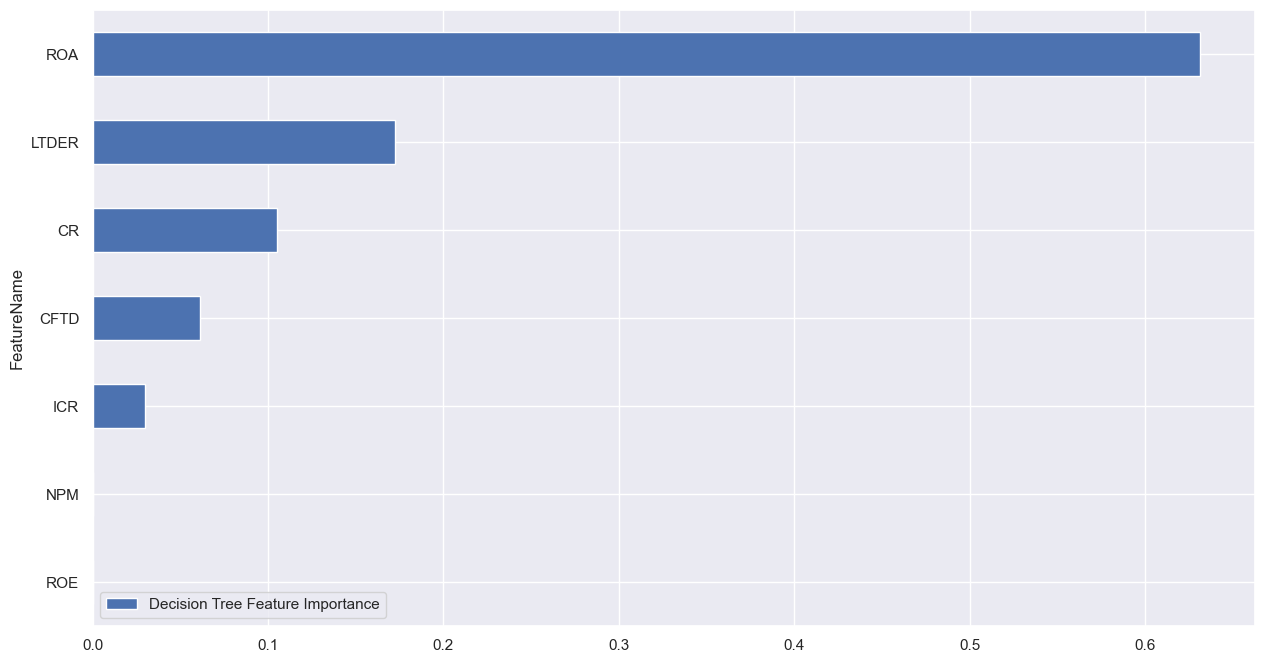

In [ ]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8),
                                                                             x="FeatureName",
                                                                             y=["Decision Tree Feature Importance"],
                                                                             kind="barh")

c. ROC Curve

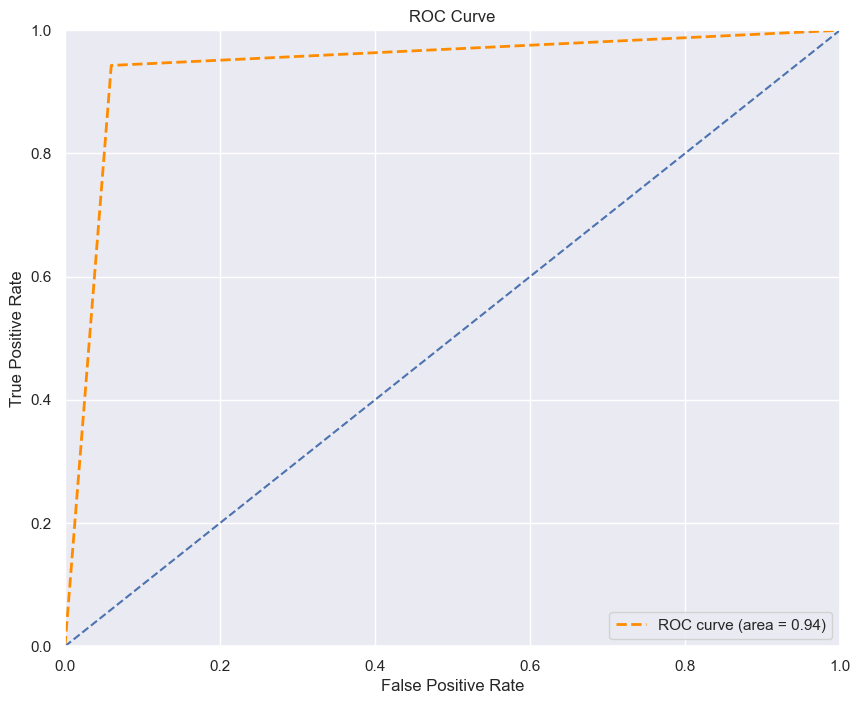

In [ ]:
y_pred_prob_test_dt = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test_dt)
DT_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, DT_roc_auc)

### Random Forest Classifier

In this method, many decision trees are constructed using subsets of randomly selected features. The sample and feature subsets are randomly selected to ensure the diversity of the classifiers. Then, the random forest is built for several subsets that generate the same number of classification trees. The preferred class is defined by a majority of votes; thus, the results are more precise and, most importantly, avoid model overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

# Predicting the train set results
y_pred = RF_classifier.predict(X_train)

print(classification_report(y_train,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00        65

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Random Forest accuracy:  1.0


Text(0.5, 20.049999999999997, 'Predicted label')

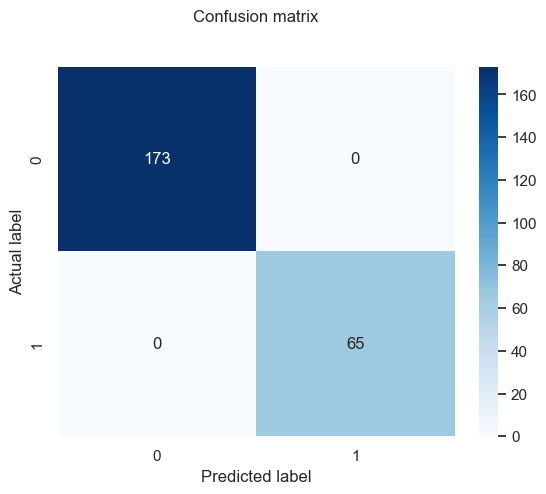

In [ ]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Predicting the test set results
RF_y_pred = RF_classifier.predict(X_test)

print('Classification report:')
print(classification_report(y_test,RF_y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, RF_y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.94      0.97      0.96        35

    accuracy                           0.97       102
   macro avg       0.96      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102

Random Forest accuracy:  0.9705882352941176


Text(0.5, 20.049999999999997, 'Predicted label')

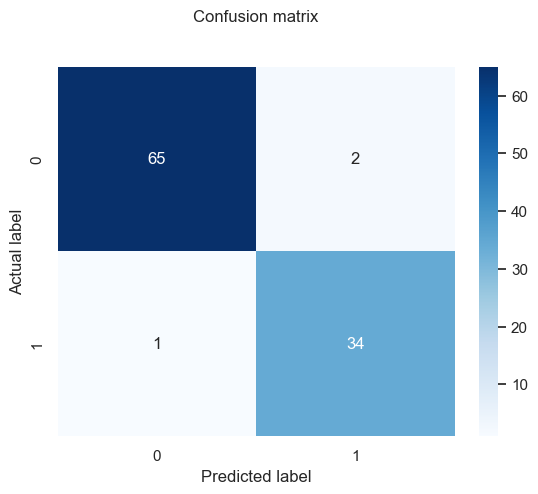

In [ ]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,RF_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': df.loc[:,features].columns,
                                        'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
5,ROA,0.252147
4,NPM,0.202424
3,CR,0.190520
0,LTDER,0.144177
1,ICR,0.120201
6,CFTD,0.064678
2,ROE,0.025852


<AxesSubplot:ylabel='FeatureName'>

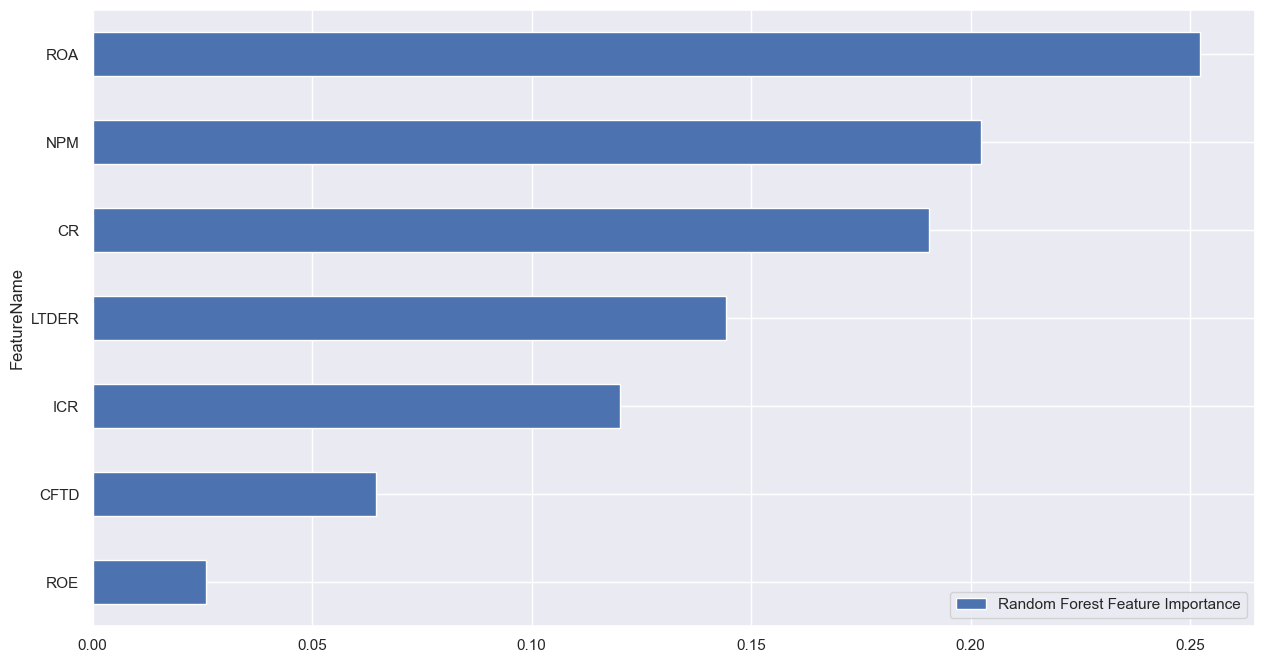

In [ ]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8),
                                                                             x="FeatureName",
                                                                             y=["Random Forest Feature Importance"],
                                                                             kind="barh")

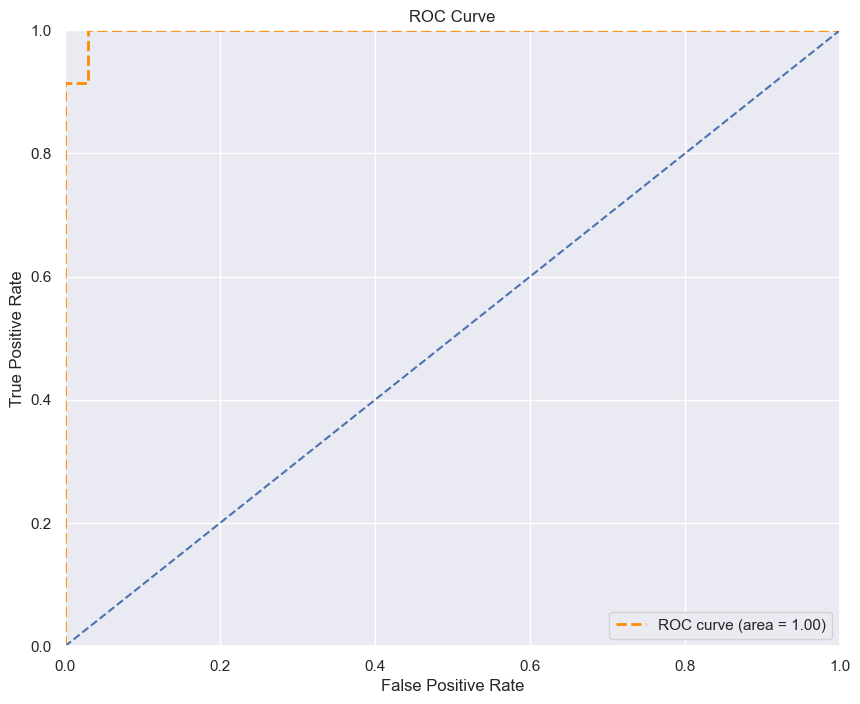

In [ ]:
y_pred_prob_test_rf = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test_rf)
RF_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, RF_roc_auc)

### eXtreme Gradient Boosting (XGB)

Gradient boosting is a machine-learning technique used in regression and classification tasks. It gives a prediction model in the form of an ensemble of weak prediction models, typically decision trees. Extreme gradient boosting constructs decision trees in parallel and incorporates complexity control in the loss function to control overfitting and achieve better performance results. The model is regarded as one of the best supervised learners which is fast to train and supported by various packages and platforms. But it has a large and complex set of hyperparameters which are not easy to be tuned.

In [ ]:
#pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

# Predicting the train set results
y_pred = XGB_classifier.predict(X_train)

print('Classification report:')
print(classification_report(y_train,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_train, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00        65

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

XGBoost accuracy:  1.0


Text(0.5, 20.049999999999997, 'Predicted label')

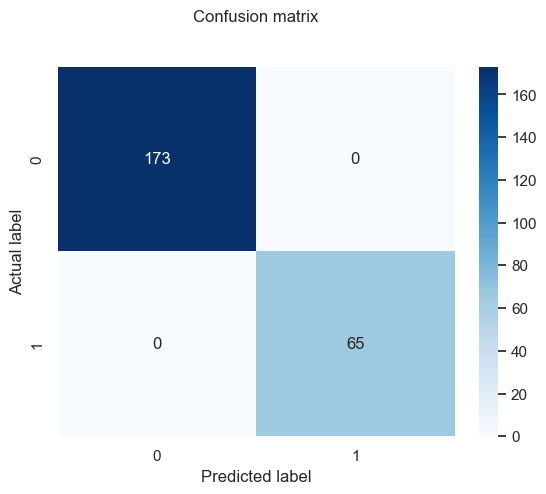

In [ ]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Predicting the test set results
XGB_y_pred = XGB_classifier.predict(X_test)

print('Classification report:')
print(classification_report(y_test,XGB_y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, XGB_y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.94      0.94      0.94        35

    accuracy                           0.96       102
   macro avg       0.96      0.96      0.96       102
weighted avg       0.96      0.96      0.96       102

XGBoost accuracy:  0.9607843137254902


Text(0.5, 20.049999999999997, 'Predicted label')

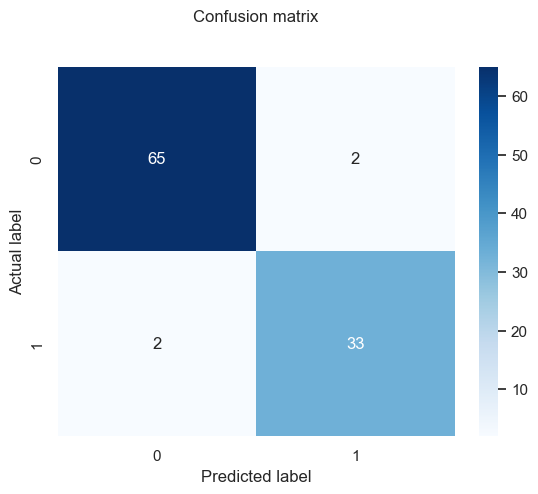

In [ ]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,XGB_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': df.loc[:,features].columns,
                                         'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)

,FeatureName,XGBoost Feature Importance
5,ROA,0.730497
3,CR,0.094393
0,LTDER,0.084206
4,NPM,0.034342
6,CFTD,0.028875
1,ICR,0.027392
2,ROE,0.000295


<AxesSubplot:ylabel='FeatureName'>

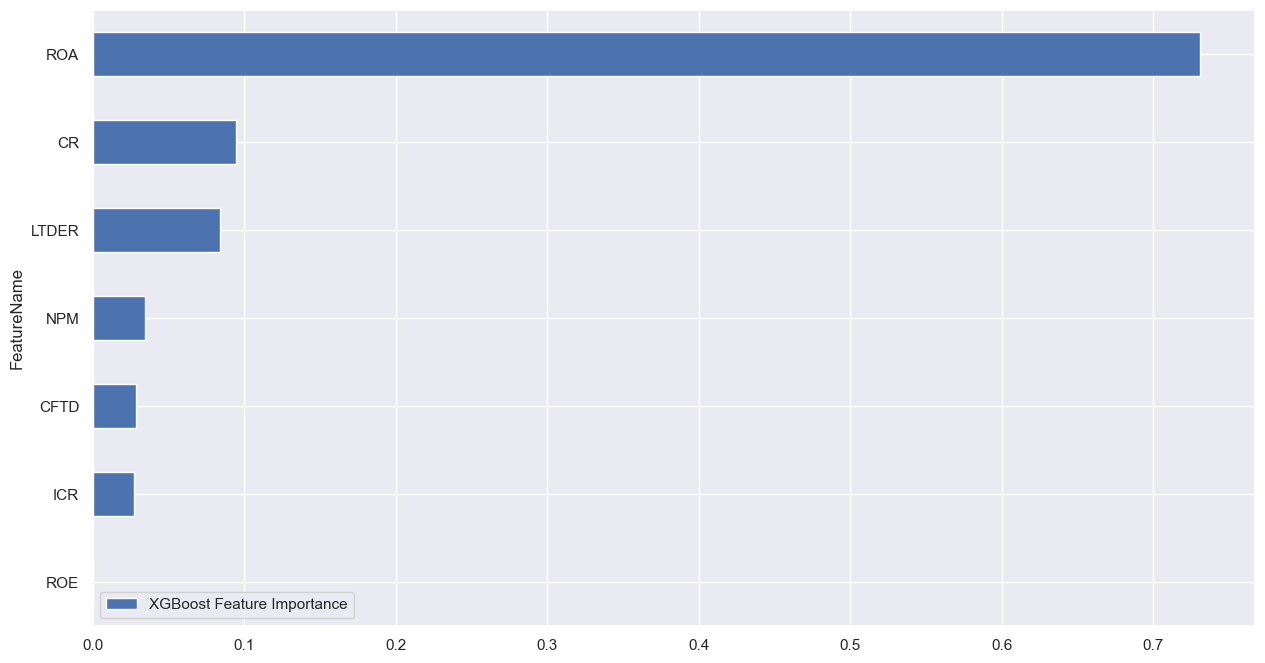

In [ ]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

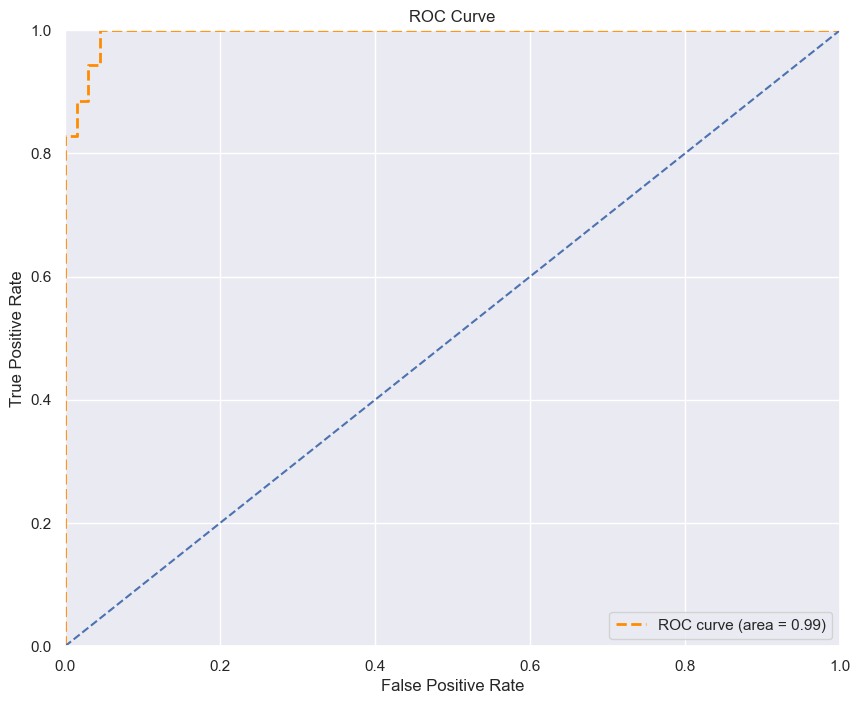

In [ ]:
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
XGB_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, XGB_roc_auc)

### SVM

Support vector machines (SVMs) are based on the idea of defining hyperplanes that decompose observations into high-dimensional feature spaces. Linear SVMs models focus on maximizing the margin between positive and negative hyperplanes.
For nonlinear cases, a kernel is used to project features into a high-dimensional space.
The strength of SVM is that it avoids overfitting with small samples and is less sensitive to unbalanced distributions.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
svm_classifier.fit(X_train, y_train.ravel())

# Predicting the train set results
y_pred = svm_classifier.predict(X_train)

print('Classification report:')
print(classification_report(y_train,y_pred))
print('SVM accuracy: ', accuracy_score(y_train, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       173
           1       0.93      0.88      0.90        65

    accuracy                           0.95       238
   macro avg       0.94      0.93      0.94       238
weighted avg       0.95      0.95      0.95       238

SVM accuracy:  0.9495798319327731


Text(0.5, 20.049999999999997, 'Predicted label')

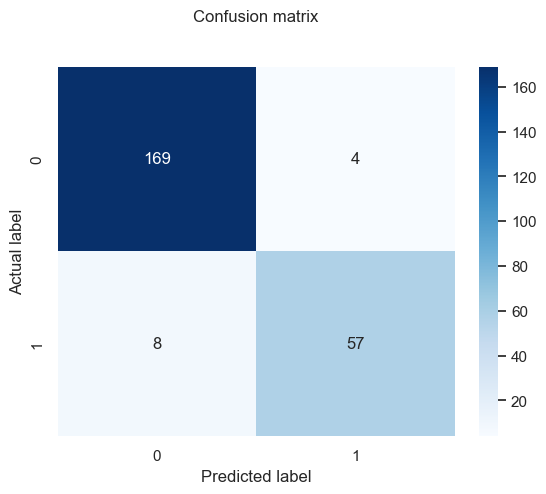

In [ ]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Predicting the test set results
svm_y_pred = svm_classifier.predict(X_test)

print('Classification report:')
print(classification_report(y_test,svm_y_pred))
print('SVM accuracy: ', accuracy_score(y_test, svm_y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        67
           1       0.76      0.91      0.83        35

    accuracy                           0.87       102
   macro avg       0.86      0.88      0.86       102
weighted avg       0.89      0.87      0.87       102

SVM accuracy:  0.8725490196078431


Text(0.5, 20.049999999999997, 'Predicted label')

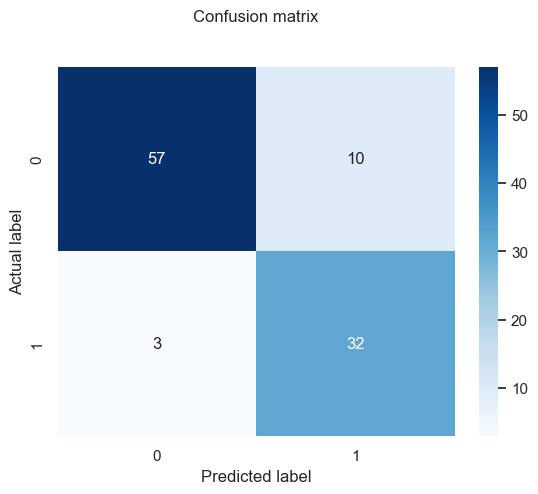

In [ ]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,svm_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

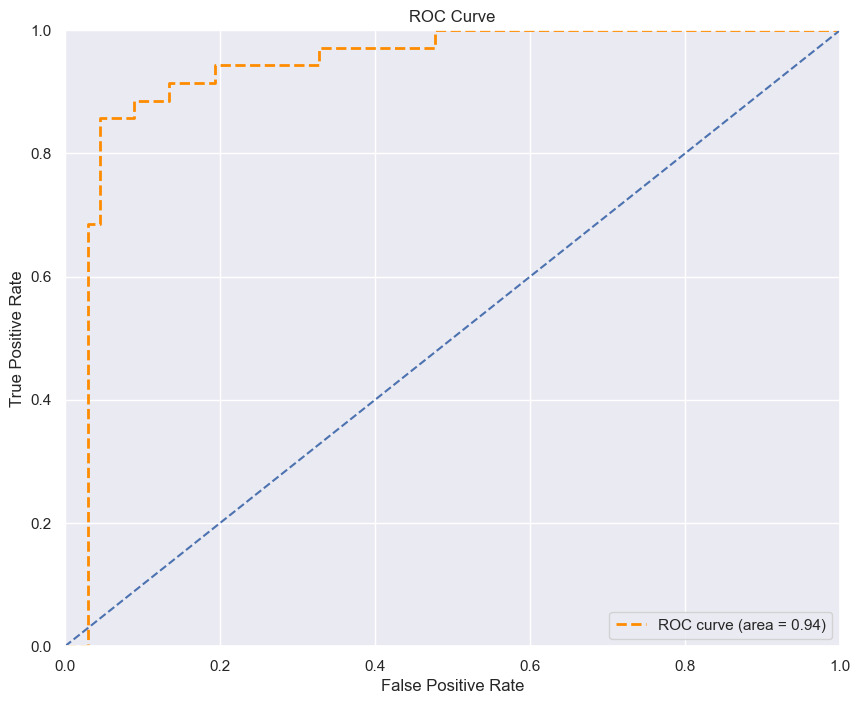

In [ ]:
y_pred_prob_test = svm_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
svm_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, svm_roc_auc)

### 5. Compare

<Figure size 1500x800 with 0 Axes>

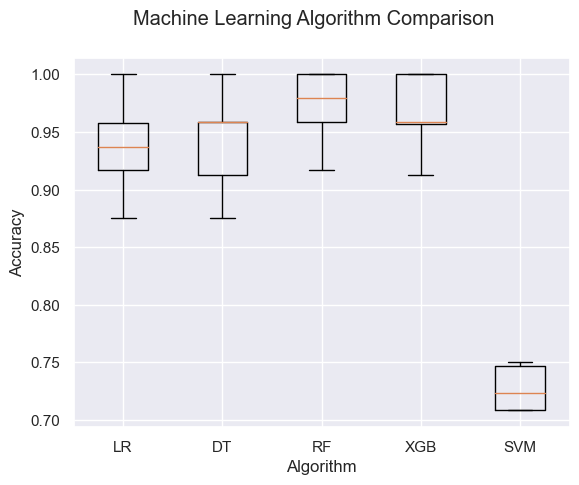

In [ ]:
# Define the models to evaluate
models = [
    ('LR', LogisticRegression()),
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('XGB',XGBClassifier()),
    ('SVM',SVC())
]

# Evaluate each model on the test set using 10-fold cross-validation and store the results
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

# Generate a boxplot comparing the model performance
plt.figure(figsize = (15,8)) #11,6
fig = plt.figure()
fig.suptitle('Machine Learning Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
d={
    '': ['Logistic Regression','Decision Tree','Random Forest','XGB','SVM'],
    'Accuracy': [LR_classifier.score(X_test, y_test), DT_classifier.score(X_test,y_test),RF_classifier.score(X_test,y_test),
                 XGB_classifier.score(X_test,y_test),svm_classifier.score(X_test, y_test)],
    'Precision': [precision_score(y_test, LR_y_pred), precision_score(y_test, DT_y_pred),precision_score(y_test, RF_y_pred),
                  precision_score(y_test, XGB_y_pred), precision_score(y_test, svm_y_pred)],
    'Recall': [recall_score(y_test, LR_y_pred), recall_score(y_test, DT_y_pred),recall_score(y_test, RF_y_pred),
              recall_score(y_test, XGB_y_pred), recall_score(y_test, svm_y_pred)],
    'F1': [f1_score(y_test, LR_y_pred), f1_score(y_test, DT_y_pred),f1_score(y_test, RF_y_pred),
          f1_score(y_test, XGB_y_pred), f1_score(y_test, svm_y_pred)],
    'ROC AUC': [LR_roc_auc, DT_roc_auc, RF_roc_auc, XGB_roc_auc, svm_roc_auc]
}

results=pd.DataFrame(data=d).round(2).set_index('')
results


,Accuracy,Precision,Recall,F1,ROC AUC
,,,,,
Logistic Regression,0.85,0.74,0.89,0.81,0.92
Decision Tree,0.94,0.89,0.94,0.92,0.94
Random Forest,0.97,0.94,0.97,0.96,1.00
XGB,0.96,0.94,0.94,0.94,0.99
SVM,0.87,0.76,0.91,0.83,0.94


The Random Forest and XGB classifiers have higher accuracy, precision, Recall, F1 score, and ROC AUC than the other models. Therefore, these two models can be considered better for the classification goal of predicting.

### Resampling

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [ ]:
X_train_over

,LTDER,ICR,ROE,CR,NPM,ROA,CFTD
0,0.140547,52.293526,0.134584,1.101755,0.049509,0.086054,0.523696
1,1.287151,1.936580,0.020891,0.712135,0.076759,0.007003,0.028761
2,0.015465,158.836478,0.281186,3.035942,0.348658,0.197069,1.090085
3,0.012862,0.000000,0.097291,3.946820,0.117824,0.082360,0.472134
4,0.005125,165.883679,-0.017002,8.157813,-0.023084,-0.015802,-0.343807
...,...,...,...,...,...,...,...
341,1.080480,1.773011,0.000371,0.499965,0.001159,0.000130,-0.093215
342,0.154478,2.984439,0.191989,0.770193,0.081222,0.066273,-0.100831
343,-0.131884,0.182452,0.084854,0.302597,-0.109274,-0.083856,0.042576
344,-1.795119,1.442064,0.055968,1.165874,-0.200424,-0.061839,0.023570


In [ ]:
y_train_over

,financial_distress
0,0
1,1
2,0
3,0
4,0
...,...
341,1
342,1
343,1
344,1


In [ ]:
y_train_over.value_counts()

financial_distress
0                     173
1                     173
dtype: int64

In [ ]:
print('Predict on testing set')
over_classifier = RandomForestClassifier()
over_classifier.fit(X_train_over.values, y_train_over.values.ravel())

y_pred_over = over_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred_over))
print(classification_report(y_test,y_pred_over))
print('RandomForestClassifier accuracy: ', accuracy_score(y_test, y_pred_over))

Predict on testing set
[[65  2]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.94      0.97      0.96        35

    accuracy                           0.97       102
   macro avg       0.96      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102

RandomForestClassifier accuracy:  0.9705882352941176


### Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X, y)

In [ ]:
X_train_under

,LTDER,ICR,ROE,CR,NPM,ROA,CFTD
0,0.172538,8.403570,0.050231,0.813524,0.004555,0.024150,0.060843
1,0.063483,47.615000,0.183035,1.671371,0.102167,0.098651,0.173141
2,0.000000,6132.805819,0.169391,14.061019,0.292009,0.159935,3.627038
3,0.000244,0.000000,0.285848,1.730229,0.116082,0.222494,1.130650
4,0.087253,106.720054,0.041346,6.900124,0.070190,0.035101,0.083021
...,...,...,...,...,...,...,...
195,1.647303,-4.199046,-0.293637,0.078878,-1.572770,-0.068096,0.007135
196,1.856112,-1.100590,-0.185522,0.146273,-1.762784,-0.032498,0.003554
197,2.024561,-0.291675,-0.068125,0.153600,-0.517235,-0.009322,0.006705
198,3.761222,0.000000,-0.205799,0.060469,-1.202900,-0.021249,0.208124


In [ ]:
y_train_under

,financial_distress
0,0
1,0
2,0
3,0
4,0
...,...
195,1
196,1
197,1
198,1


In [ ]:
y_train_under.value_counts()

financial_distress
0                     100
1                     100
dtype: int64

In [ ]:
under_classifier = RandomForestClassifier()
under_classifier.fit(X_train_under.values, y_train_under.values.ravel())

y_pred_under = under_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred_under))
print(classification_report(y_test,y_pred_under))
print('RandomForestClassifier accuracy: ', accuracy_score(y_test, y_pred_under))

[[65  2]
 [ 0 35]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        67
           1       0.95      1.00      0.97        35

    accuracy                           0.98       102
   macro avg       0.97      0.99      0.98       102
weighted avg       0.98      0.98      0.98       102

RandomForestClassifier accuracy:  0.9803921568627451


In [ ]:
recall_score(y_test, y_pred_under)

1.0

In [ ]:
d={
    '': ['RF','RandomForestClassifier oversampling','RandomForestClassifier undersampling'],
    'Accuracy': [RF_classifier.score(X_test, y_test),
                 over_classifier.score(X_test,y_test),under_classifier.score(X_test, y_test)],
    'Precision': [precision_score(y_test, RF_y_pred),
                  precision_score(y_test, y_pred_over), precision_score(y_test, y_pred_under)],
    'Recall': [recall_score(y_test, RF_y_pred),
              recall_score(y_test, y_pred_over), recall_score(y_test, y_pred_under)],
    'F1': [f1_score(y_test, RF_y_pred),
          f1_score(y_test, y_pred_over), f1_score(y_test, y_pred_under)]
}

results=pd.DataFrame(data=d).round(2).set_index('')
results

,Accuracy,Precision,Recall,F1
,,,,
RF,0.97,0.94,0.97,0.96
RandomForestClassifier oversampling,0.97,0.94,0.97,0.96
RandomForestClassifier undersampling,0.98,0.95,1.00,0.97


Recall measures the ability of the model to correctly identify all positive samples in the dataset. A high recall score means that the model is successfully identifying a large percentage of the positive samples and thus, reducing the number of false negatives.

It is recommended to choose under sampling with Random Forest Classifier model because high recall will accurately forecast the most financial distress companies.

### Conclution

This findings would help creditors concentrate on parameters such as LTDER, ICR, CR, ROA, CFTD and NPM to understand the firm’s financial standing and be watchful for signs of impending financial distress to avoid capital loss and cost related to counterparty default. This findings would also help auditors evaluate firm performance both regarding financial as well as non-financial factors and in preparing the audit report on whether a company will be distressed or not.

### References

Altman, E. I., (1968). Financial  ratios, discriminant  analysis  and  the  prediction of coporated bankcruptcy. The Journal of Finance, Vol 23(4), 589-609;

Balasubramanian, S. A., GS, R., & Natarajan, T. (2019). Modeling corporate financial distress using financial and non-financial variables: The case of Indian listed companies. International Journal of Law and Management, 61(3/4), 457-484;

Beaver, W. H., (1968). Market prices, financial ratios, and the predictors of failure. Journal of Accounting Research, Vol.6, No.2 (Autumn, 1968), pp.179-192;

Dirman, A. (2020). Financial distress: the impacts of profitability, liquidity, leverage, firm size, and free cash flow. International Journal of Business, Economics and Law, 22(1), 17-25;

Sehgal, S., Mishra, R. K., Deisting, F., & Vashisht, R. (2021). On the determinants and prediction of corporate financial distress in India. Managerial Finance, 47(10), 1428-1447;

Tran, K. L., Le, H. A., Nguyen, T. H., & Nguyen, D. T. (2022). Explainable Machine Learning for Financial Distress Prediction: Evidence from Vietnam. Data, 7(11), 160;

Ruizhao, Z. (2022). ANALYZE THE FACTORS AFFECTING THE FINANCIAL DISTRESS OF CHINA'S MANUFACTURING INDUSTRY (Doctoral dissertation, President University).